In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#formule per la normalizzazione

In [5]:
data=pd.read_csv("./sp500.csv", usecols=["Date", "SP500"], parse_dates=["Date"], index_col="Date")
#quando leggiamo un dataset possiamo specificare le colonne
#index_col: data come indici
#parse dates: data nonm come una stringa
data

,SP500
Date,
1871-01-01,4.44
1871-02-01,4.50
1871-03-01,4.61
1871-04-01,4.74
1871-05-01,4.86
...,...
2017-12-01,2664.34
2018-01-01,2789.80
2018-02-01,2705.16


In [3]:
data=data["1900-01-01":]#utilizzare dati ha più rischi, date, mese con diversi giorni
#aggiungiamo una colonna: quanti giorni sono passati

In [4]:
data["DF1900"]=(data.index-pd.to_datetime("1900-01-01")).days
data.set_index("DF1900", inplace=True)#impostiamo la colonna come indice, in modo da usare dati numerici
data["DF1900"]=data.index


In [7]:
?pd.to_datetime

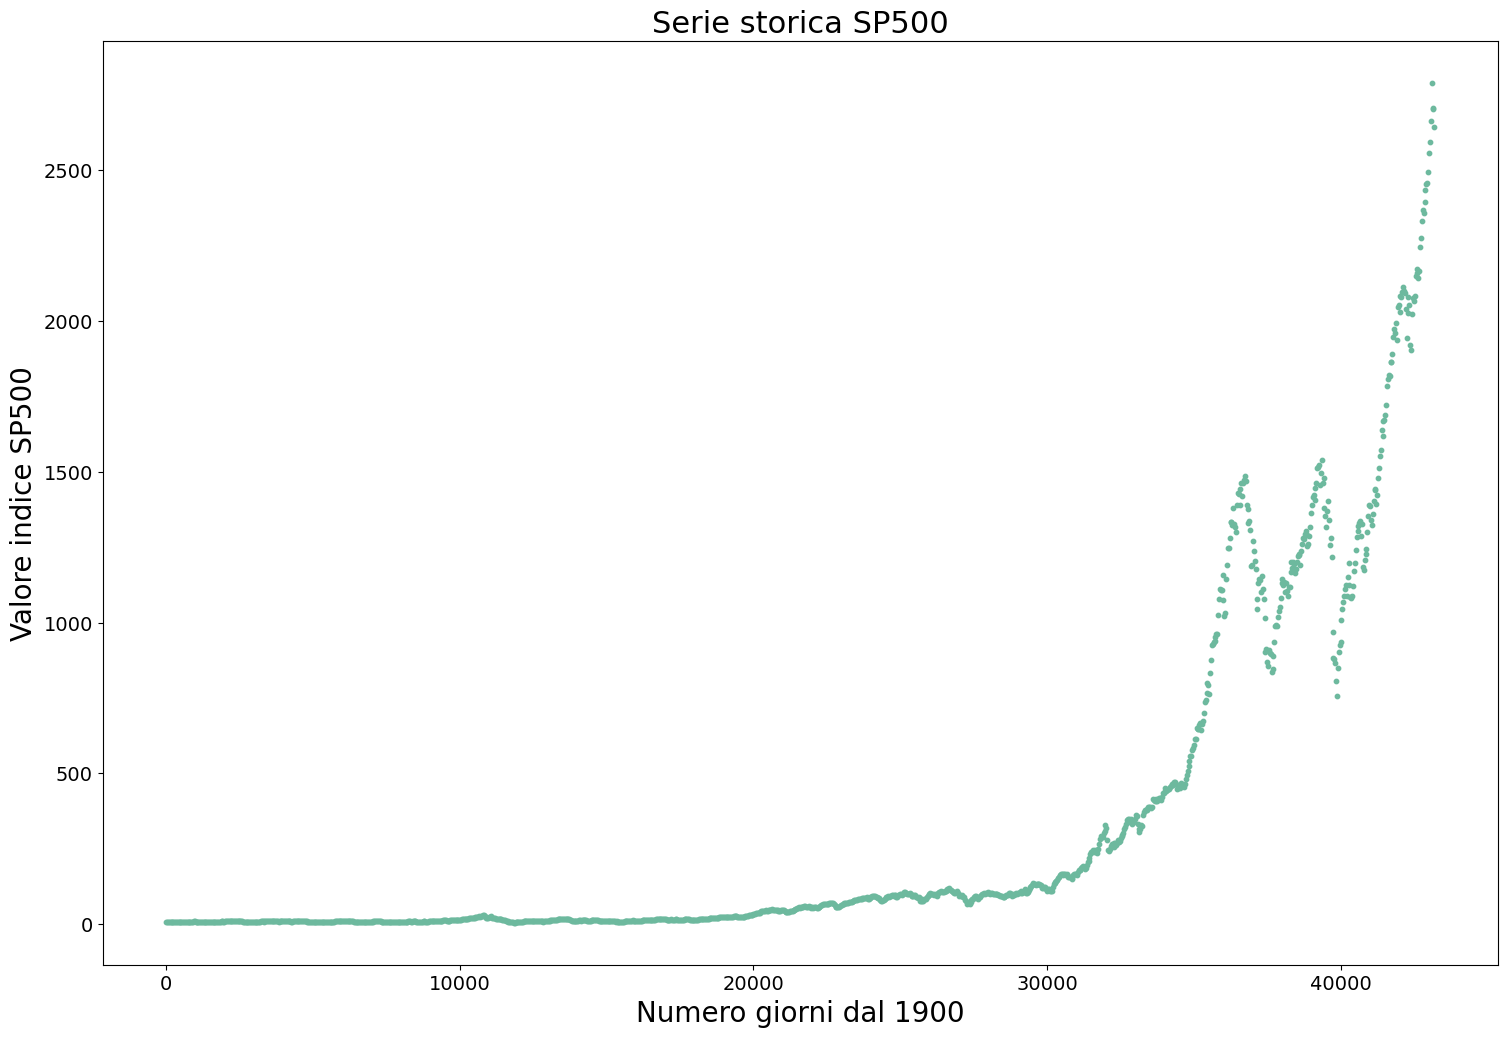

In [11]:
fig, ax=plt.subplots(figsize=(18,12))
ax.tick_params(axis="both", labelsize=14)
ax.set_title("Serie storica SP500", fontsize=22)
ax.scatter(data["DF1900"], data["SP500"], label="Dati campionati", color=np.random.uniform(0,1,3), s=10)
ax.set_ylabel("Valore indice SP500", fontsize=20 )
ax.set_xlabel("Numero giorni dal 1900", fontsize=20 )
plt.show()

### Normalizzazione
con metodi

In [13]:
X=data[["DF1900"]].values
y=data[["SP500"]].values
sc_x=StandardScaler()
sc_y=StandardScaler()
X_sc=sc_x.fit_transform(X)
y_sc=sc_y.fit_transform(y)
#non abbiamo diviso nei due set perchè nella regressione non serve

In [24]:
reg=LinearRegression().fit(X_sc, y_sc)
print(f"""
coefficiente di detrminazione R^2: {reg.score(X_sc, y_sc):.2f}
coefficiente angolare: {reg.coef_[0][0]:.2f}
intercetta: {reg.intercept_[0]:.2f}

""")


coefficiente di detrminazione R^2: 0.92
coefficiente angolare: 0.96
intercetta: 0.00




In [34]:
X_1=data[["DF1900"]].values
y_1=np.log(data[["SP500"]].values)
sc_x_1=StandardScaler()
sc_y_1=StandardScaler()
X_sc_1=sc_x_1.fit_transform(X)
y_sc_1=sc_y_1.fit_transform(y)



In [37]:
data["Linear Regressione"]=sc_y_1.inverse_transform(reg.predict(X_sc_1))
reg_1=LinearRegression().fit(X_sc_1, y_sc_1)
print(f"""
coefficiente di detrminazione R^2: {reg_1.score(X_sc_1, y_sc_1):.2f}
coefficiente angolare: {reg_1.coef_[0][0]:.2f}
intercetta: {reg_1.intercept_[0]:.2f}

""")


coefficiente di detrminazione R^2: 0.92
coefficiente angolare: 0.96
intercetta: 0.00




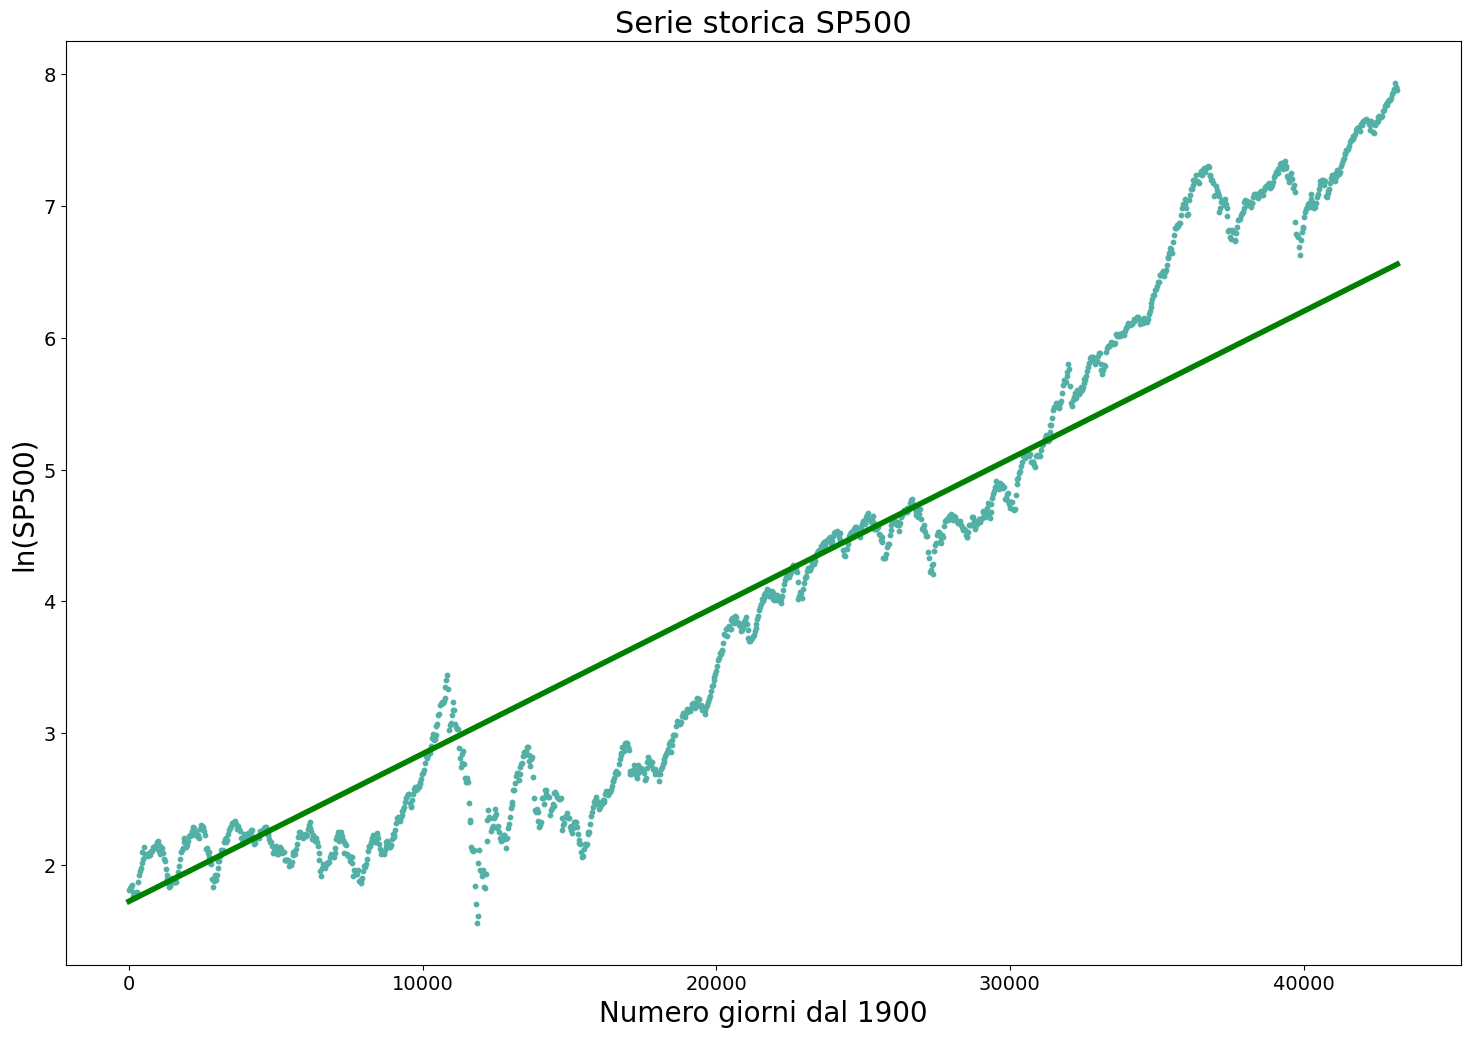

In [26]:
fig, ax=plt.subplots(figsize=(18,12))
ax.tick_params(axis="both", labelsize=14)
ax.set_title("Serie storica SP500", fontsize=22)
ax.scatter(x=X, y=y, label="Dati campionati", color=np.random.uniform(0,1,3), s=10)
ax.set_ylabel("ln(SP500)", fontsize=20 )
data["Linear Regressione"].plot(lw=4, color="g", ax=ax)
ax.set_xlabel("Numero giorni dal 1900", fontsize=20 )
plt.show()